In [1]:
import numpy as np
import matplotlib.pyplot as plt


from qiskit import QuantumCircuit, generate_preset_pass_manager
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import SparsePauliOp

from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler, EstimatorV2 as Estimator

from qiskit_aer import AerSimulator

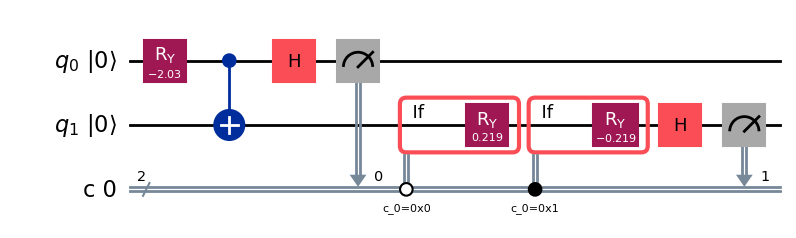

In [2]:
from qet import MinimalQETCircuit, LongRangeQETCircuit

qet = MinimalQETCircuit(3, 6, v_measure=True)
qet.build_circuit()
qet.draw_circuit()

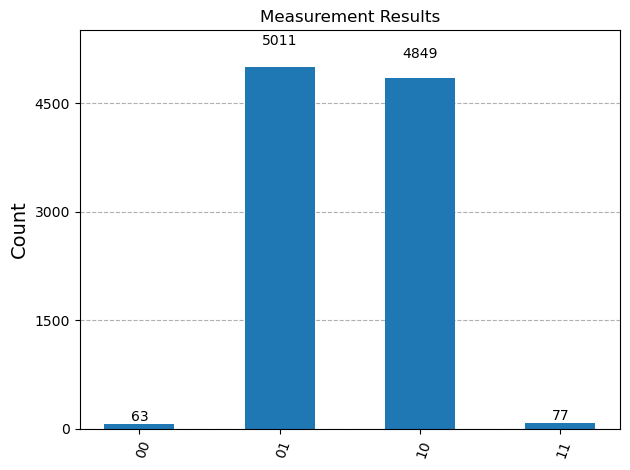

In [3]:
backend = AerSimulator()
counts_list = qet.get_counts(backend = backend, shots=10000)
display(plot_histogram(counts_list, title="Measurement Results"))

In [4]:
qet.calculate_EA()

Alice's exact local energy: 1.3416407864998738
Alice's measured local energy, E_A: 1.3536407864998738 ± 0.02999975999903999


(np.float64(1.3416407864998738),
 np.float64(1.3536407864998738),
 np.float64(0.02999975999903999))

In [5]:
qet.calculate_EV()

The interacting energy, E_V: -0.9620737080010091 ± 0.119958806529575


(np.float64(-0.9620737080010091), np.float64(0.119958806529575))

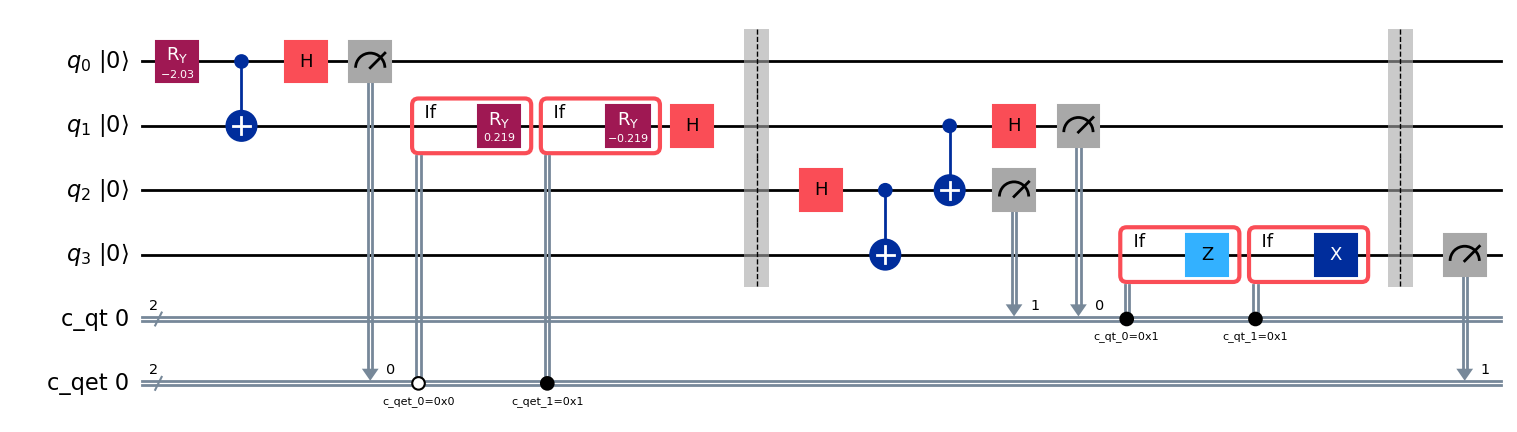

In [10]:
lr_qet = LongRangeQETCircuit(3, 6, v_measure=True)
lr_qet.build_circuit()
lr_qet.draw_circuit()

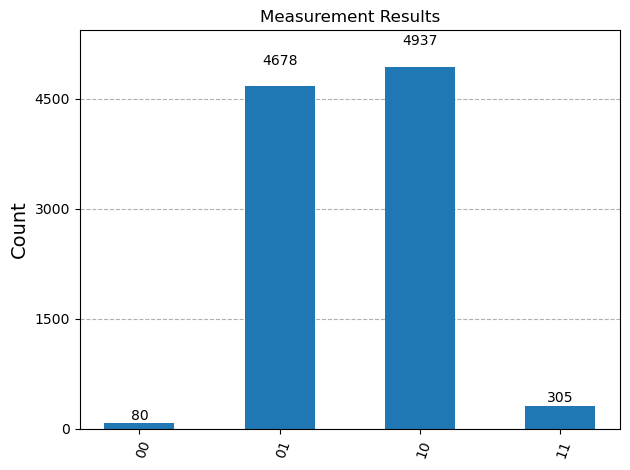

In [11]:
backend = AerSimulator()
lr_counts_list = lr_qet.get_counts(backend = backend, shots=10000)
display(plot_histogram(lr_counts_list, title="Measurement Results"))

In [12]:
lr_qet.calculate_EA()

Alice's exact local energy: 1.3416407864998738
Alice's measured local energy, E_A: 1.3404407864998735 ± 0.029999997599999908


(np.float64(1.3416407864998738),
 np.float64(1.3404407864998735),
 np.float64(0.029999997599999908))

In [13]:
lr_qet.calculate_EV()

The interacting energy, E_V: -0.45807370800100944 ± 0.11992647747682743


(np.float64(-0.45807370800100944), np.float64(0.11992647747682743))